<!-- Copyright 2015 Google Inc. All rights reserved. -->

<!-- Licensed under the Apache License, Version 2.0 (the "License"); -->
<!-- you may not use this file except in compliance with the License. -->
<!-- You may obtain a copy of the License at -->

<!--     http://www.apache.org/licenses/LICENSE-2.0 -->

<!-- Unless required by applicable law or agreed to in writing, software -->
<!-- distributed under the License is distributed on an "AS IS" BASIS, -->
<!-- WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. -->
<!-- See the License for the specific language governing permissions and -->
<!-- limitations under the License. -->

# Explore the 1000 Genomes Sample Information

This notebook demonstrates exploring the sample information for the 1000 Genomes dataset stored in BigQuery.  Specifically you will:
* Use the `%%sql` statement to write and execute SQL statements within the notebook
* Extract data from BigQuery and create a local dataset that can be manipulated in Python
* Refine and pivot your local dataset via the Pandas Python library
* Visualize different aspects of your dataset via the Matplotlib and Seaborn Python libraries

Related Links:
* [BigQuery](https://cloud.google.com/bigquery/)
* BigQuery [SQL reference](https://cloud.google.com/bigquery/query-reference)
* [1,000 Genomes Data Description](http://googlegenomics.readthedocs.org/en/latest/use_cases/discover_public_data/1000_genomes.html)
* This notebook is based on the [Google Genomics](https://cloud.google.com/genomics/) BigQuery example [Exploring the Phenotypic Data](https://github.com/googlegenomics/bigquery-examples/tree/master/1000genomes/data-stories/exploring-the-phenotypic-data)

----

NOTE:

* If you're new to notebooks, or want to check out additional samples, check out the full [list](../) of general notebooks.
* For additional Genomics samples, check out the full [list](./) of Genomics notebooks.

## Working with data in BigQuery

First let's take a look at the [1000 Genomes](http://www.1000genomes.org/) sample dataset table.

In [1]:
import gcp.bigquery as bq
samples_table = bq.Table('genomics-public-data:1000_genomes.sample_info')
samples_table.schema

[{ 'name': 'Sample', 'type': 'STRING', 'mode':'None', 'description': 'Sample ID' },
 { 'name': 'Family_ID', 'type': 'STRING', 'mode':'None', 'description': 'Family ID' },
 { 'name': 'Population', 'type': 'STRING', 'mode':'None', 'description': '3 letter population code' },
 { 'name': 'Population_Description', 'type': 'STRING', 'mode':'None', 'description': 'Description of Population' },
 { 'name': 'Gender', 'type': 'STRING', 'mode':'None', 'description': 'Gender' },
 { 'name': 'Relationship', 'type': 'STRING', 'mode':'None', 'description': 'Relationship to other members of the family' },
 { 'name': 'Unexpected_Parent_Child', 'type': 'STRING', 'mode':'None', 'description': 'sample id for unexpected parent child relationships' },
 { 'name': 'Non_Paternity', 'type': 'STRING', 'mode':'None', 'description': 'sample ids for annotated non paternal relationships' },
 { 'name': 'Siblings', 'type': 'STRING', 'mode':'None', 'description': 'sample ids for any siblings' },
 { 'name': 'Grandparents', 'type': 'STRING', 'mode':'None', 'description': 'sample ids for any grand parents' },
 { 'name': 'Avuncular', 'type': 'STRING', 'mode':'None', 'description': 'sample ids for any avuncular relationships' },
 { 'name': 'Half_Siblings', 'type': 'STRING', 'mode':'None', 'description': 'sample ids for any half siblings' },
 { 'name': 'Unknown_Second_Order', 'type': 'STRING', 'mode':'None', 'description': 'sample ids for any unknown second order relations' },
 { 'name': 'Third_Order', 'type': 'STRING', 'mode':'None', 'description': 'sample ids for any third order cryptic relations. As mentioned above, this analysis was not as widely run as the other relatedness analyses and as such there may still be unannotated third order relations in the set' },
 { 'name': 'In_Low_Coverage_Pilot', 'type': 'BOOLEAN', 'mode':'None', 'description': 'The sample is in the low coverage pilot experiment' },
 { 'name': 'LC_Pilot_Platforms', 'type': 'STRING', 'mode':'None', 'description': 'low coverage pilot sequencing platforms ' },
 { 'name': 'LC_Pilot_Centers', 'type': 'STRING', 'mode':'None', 'description': 'low coverage pilot sequencing centers' },
 { 'name': 'In_High_Coverage_Pilot', 'type': 'BOOLEAN', 'mode':'None', 'description': 'The sample is in the high coverage pilot' },
 { 'name': 'HC_Pilot_Platforms', 'type': 'STRING', 'mode':'None', 'description': 'high coverage sequencing platforms' },
 { 'name': 'HC_Pilot_Centers', 'type': 'STRING', 'mode':'None', 'description': 'high coverage sequencing centers' },
 { 'name': 'In_Exon_Targetted_Pilot', 'type': 'BOOLEAN', 'mode':'None', 'description': 'The Sample is in the exon targetted pilot experiment' },
 { 'name': 'ET_Pilot_Platforms', 'type': 'STRING', 'mode':'None', 'description': 'exon targetted sequencing platforms,' },
 { 'name': 'ET_Pilot_Centers', 'type': 'STRING', 'mode':'None', 'description': 'exon targetted sequencing centers,' },
 { 'name': 'Has_Sequence_in_Phase1', 'type': 'BOOLEAN', 'mode':'None', 'description': 'Has sequence low coverage sequence in the 20101123.sequence.index file or exome sequence in the 20110522 sequence index file' },
 { 'name': 'Phase1_LC_Platform', 'type': 'STRING', 'mode':'None', 'description': 'phase1 low coverage sequencing platforms' },
 { 'name': 'Phase1_LC_Centers', 'type': 'STRING', 'mode':'None', 'description': 'phase1 low coverage sequencing centers' },
 { 'name': 'Phase1_E_Platform', 'type': 'STRING', 'mode':'None', 'description': 'phase1 exome sequencing platforms' },
 { 'name': 'Phase1_E_Centers', 'type': 'STRING', 'mode':'None', 'description': 'phase1 exome sequencing centers' },
 { 'name': 'In_Phase1_Integrated_Variant_Set', 'type': 'BOOLEAN', 'mode':'None', 'description': 'The sample is genotyped in the phase1 integrated call set on autosomes and chrX' },
 { 'name': 'Has_Phase1_chrY_SNPS', 'type': 'BOOLEAN', 'mode':'None', 'description': 'The sample is genotyped in the chrY phase1 snp set' },
 { 'name': 'Has_phase1_chrY_Deletions', 'type': 'BOOLEAN', 'mode':'None', '

We can see in the table schema that a number of different annotations exist for each genomic sample. 

To get a feel for the dataset, let's see how the samples are distributed across populations and super populations.

In [2]:
%%sql --module pops
SELECT
  population,
  population_description,
  super_population,
  super_population_description,
  COUNT(population) AS population_count,
FROM
  $samples_table
GROUP BY
  population,
  population_description,
  super_population,
  super_population_description

In [3]:
bq.Query(pops, samples_table=samples_table).to_dataframe()

,population,population_description,super_population,super_population_description,population_count
0,GBR,British in England and Scotland,EUR,European,107
1,FIN,Finnish in Finland,EUR,European,105
2,CHS,"Southern Han Chinese, China",EAS,East Asian,171
3,PUR,Puerto Rican in Puerto Rico,AMR,American,150
4,CDX,"Chinese Dai in Xishuangbanna, China",EAS,East Asian,109
5,CLM,"Colombian in Medellin, Colombia",AMR,American,148
6,IBS,Iberian populations in Spain,EUR,European,162
7,PEL,"Peruvian in Lima, Peru",AMR,American,130
8,PJL,"Punjabi in Lahore,Pakistan",SAS,South Asian,158
9,KHV,"Kinh in Ho Chi Minh City, Vietnam",EAS,East Asian,124


In order to further analyze our query results locally within the IPython notebook, let's convert the result set into a [Pandas dataframe](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html):

In [4]:
pops_df = bq.Query(pops, samples_table=samples_table).to_dataframe()
pops_df[:5]

,population,population_description,super_population,super_population_description,population_count
0,GBR,British in England and Scotland,EUR,European,107
1,FIN,Finnish in Finland,EUR,European,105
2,CHS,"Southern Han Chinese, China",EAS,East Asian,171
3,PUR,Puerto Rican in Puerto Rico,AMR,American,150
4,CDX,"Chinese Dai in Xishuangbanna, China",EAS,East Asian,109


Pandas dataframes have a [`dataframe.plot()`](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.plot.html?highlight=dataframe.plot#pandas.DataFrame.plot) method that allows us to quickly render a number of standard visualizations. Let's draw a bar chart of the per-population sample counts:

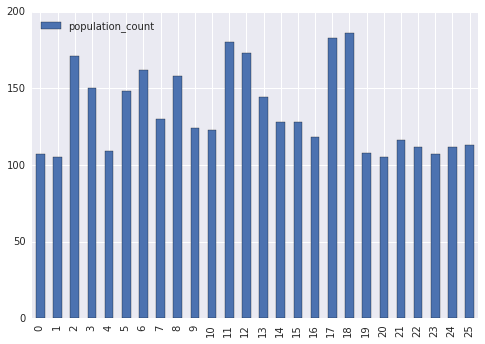

In [5]:
import seaborn as sns
pops_df.plot(kind='bar', y='population_count')

Now that we have a dataframe object, we can compute arbitrary rollups and aggregations locally. For example, let's aggregate the count of samples from the population level to the super population level. We'll do this via the [`dataframe.groupby`](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby) operation, which is generally of the form: 

```dataframe.groupby("column name").aggregation_func()```

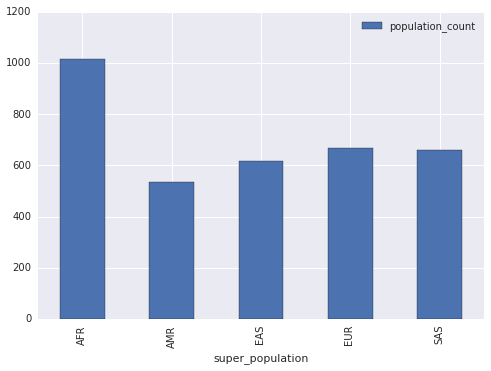

In [6]:
superpop_df = pops_df.groupby('super_population').sum()
superpop_df.plot(kind='bar')

We see that the distribution of genome samples across population and super population is relatively uniform, the exception being the AFR (African) super population.

## Genome sample metrics

Let's explore a few quantitative attributes of the genomic samples. We'll keep our super population sample classification, but also add some metrics around the extent to which given samples were sequenced, for exomic and low coverage regions. We'll further annotate our samples with a tag for the laboratory/center that produced performed the sequencing.

In [7]:
%%sql --module  metrics
select 
    super_population
    , total_lc_sequence -- lc=low coverage
    , total_exome_sequence
    , Main_Project_E_Centers
from $samples_table
where 
    total_exome_sequence is not null
    and total_lc_sequence is not null
    and Main_Project_E_Centers is not null
    and Main_Project_E_Centers != 'BCM,BGI' -- remove this single outlier

Again, we can convert these results to a Pandas dataframe for local analysis and visualization

In [8]:
df = bq.Query(metrics, samples_table=samples_table).to_dataframe()
df[:10]

,super_population,total_lc_sequence,total_exome_sequence,Main_Project_E_Centers
0,EUR,14714705600,9580861000,WUGSC
1,EUR,30285067857,5856213714,BCM
2,EUR,25134554475,8125011458,BCM
3,EUR,42906753668,15144863140,BI
4,EUR,22115533074,11754108800,WUGSC
5,EUR,21621189887,9003406100,WUGSC
6,EUR,16331033600,9145497300,WUGSC
7,EUR,22262720677,5851507215,BCM
8,EUR,24284331308,6640380441,BCM
9,EUR,23778576248,9595593000,WUGSC


To get a feel for the quantitative sample attributes, let's see how their values are distributed among the dataset samples by plotting histograms. Note that a histogram of any dataframe attribute can be easily rendered with the pattern `dataframe.attribute_name.hist()`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3deee3af50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3deec945d0>]], dtype=object)

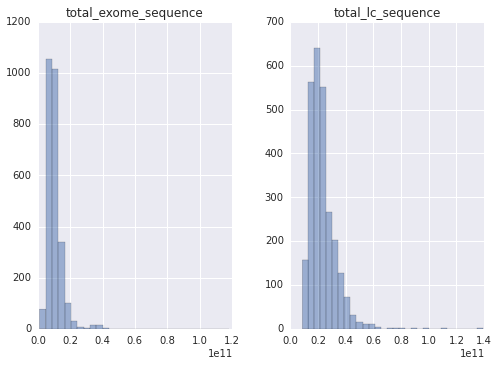

In [9]:
df.hist(alpha=0.5, bins=30)

What does the joint distribution of these two traits look like?

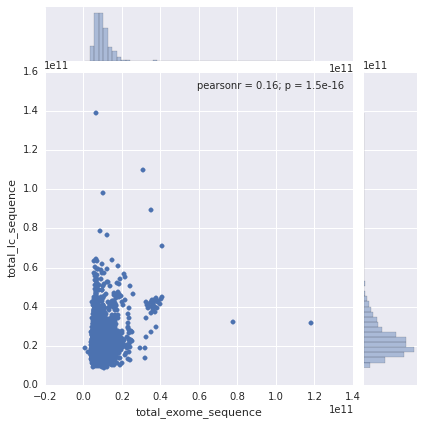

In [10]:
g = sns.jointplot('total_exome_sequence', 'total_lc_sequence', df)

Only a very slight positive correlation. Let's further annotate our scatter chart by rendering each mark with a color according to its super population assignment.

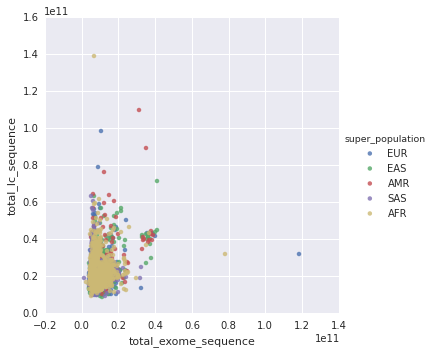

In [11]:
g = sns.lmplot('total_exome_sequence', 'total_lc_sequence', hue='super_population', data=df, fit_reg=False)

Now, let's take the same plot as above, by facet our results based upon the genomic sequencing center that produced it to look for inter-center variability in the dataset.

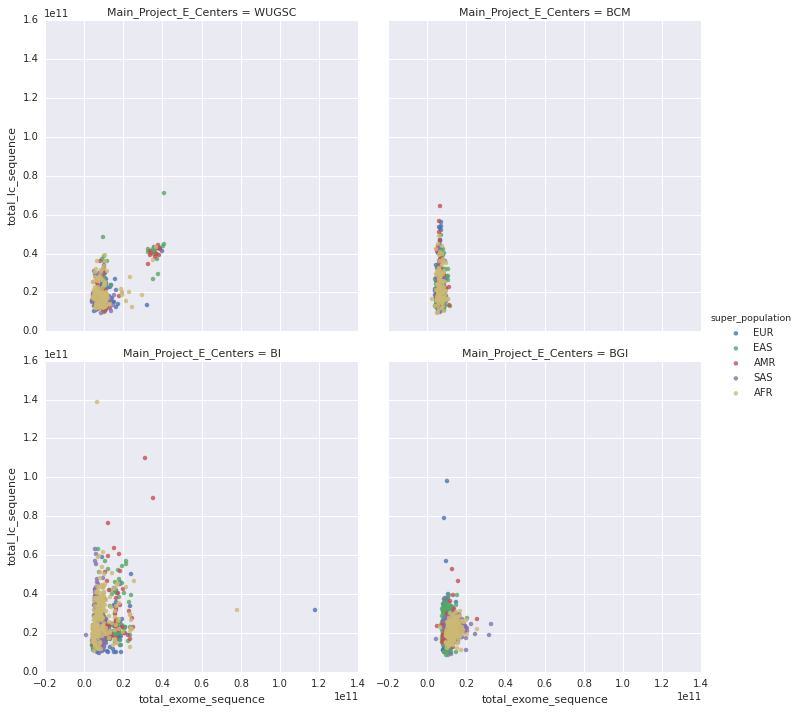

In [12]:
g = sns.lmplot('total_exome_sequence', 'total_lc_sequence', hue='super_population', col='Main_Project_E_Centers', col_wrap=2, data=df, fit_reg=False)

The WUSGC (the Genome Institute at Washington University) shows a small outlier cluster that is distinct relative to the other centers. The BCM (Baylor College of Medicine) facet appears the least variable within the exome sequencing dimension.

Are there any super population trends here? We can facet our data a second time, this time by super population to dig deeper.

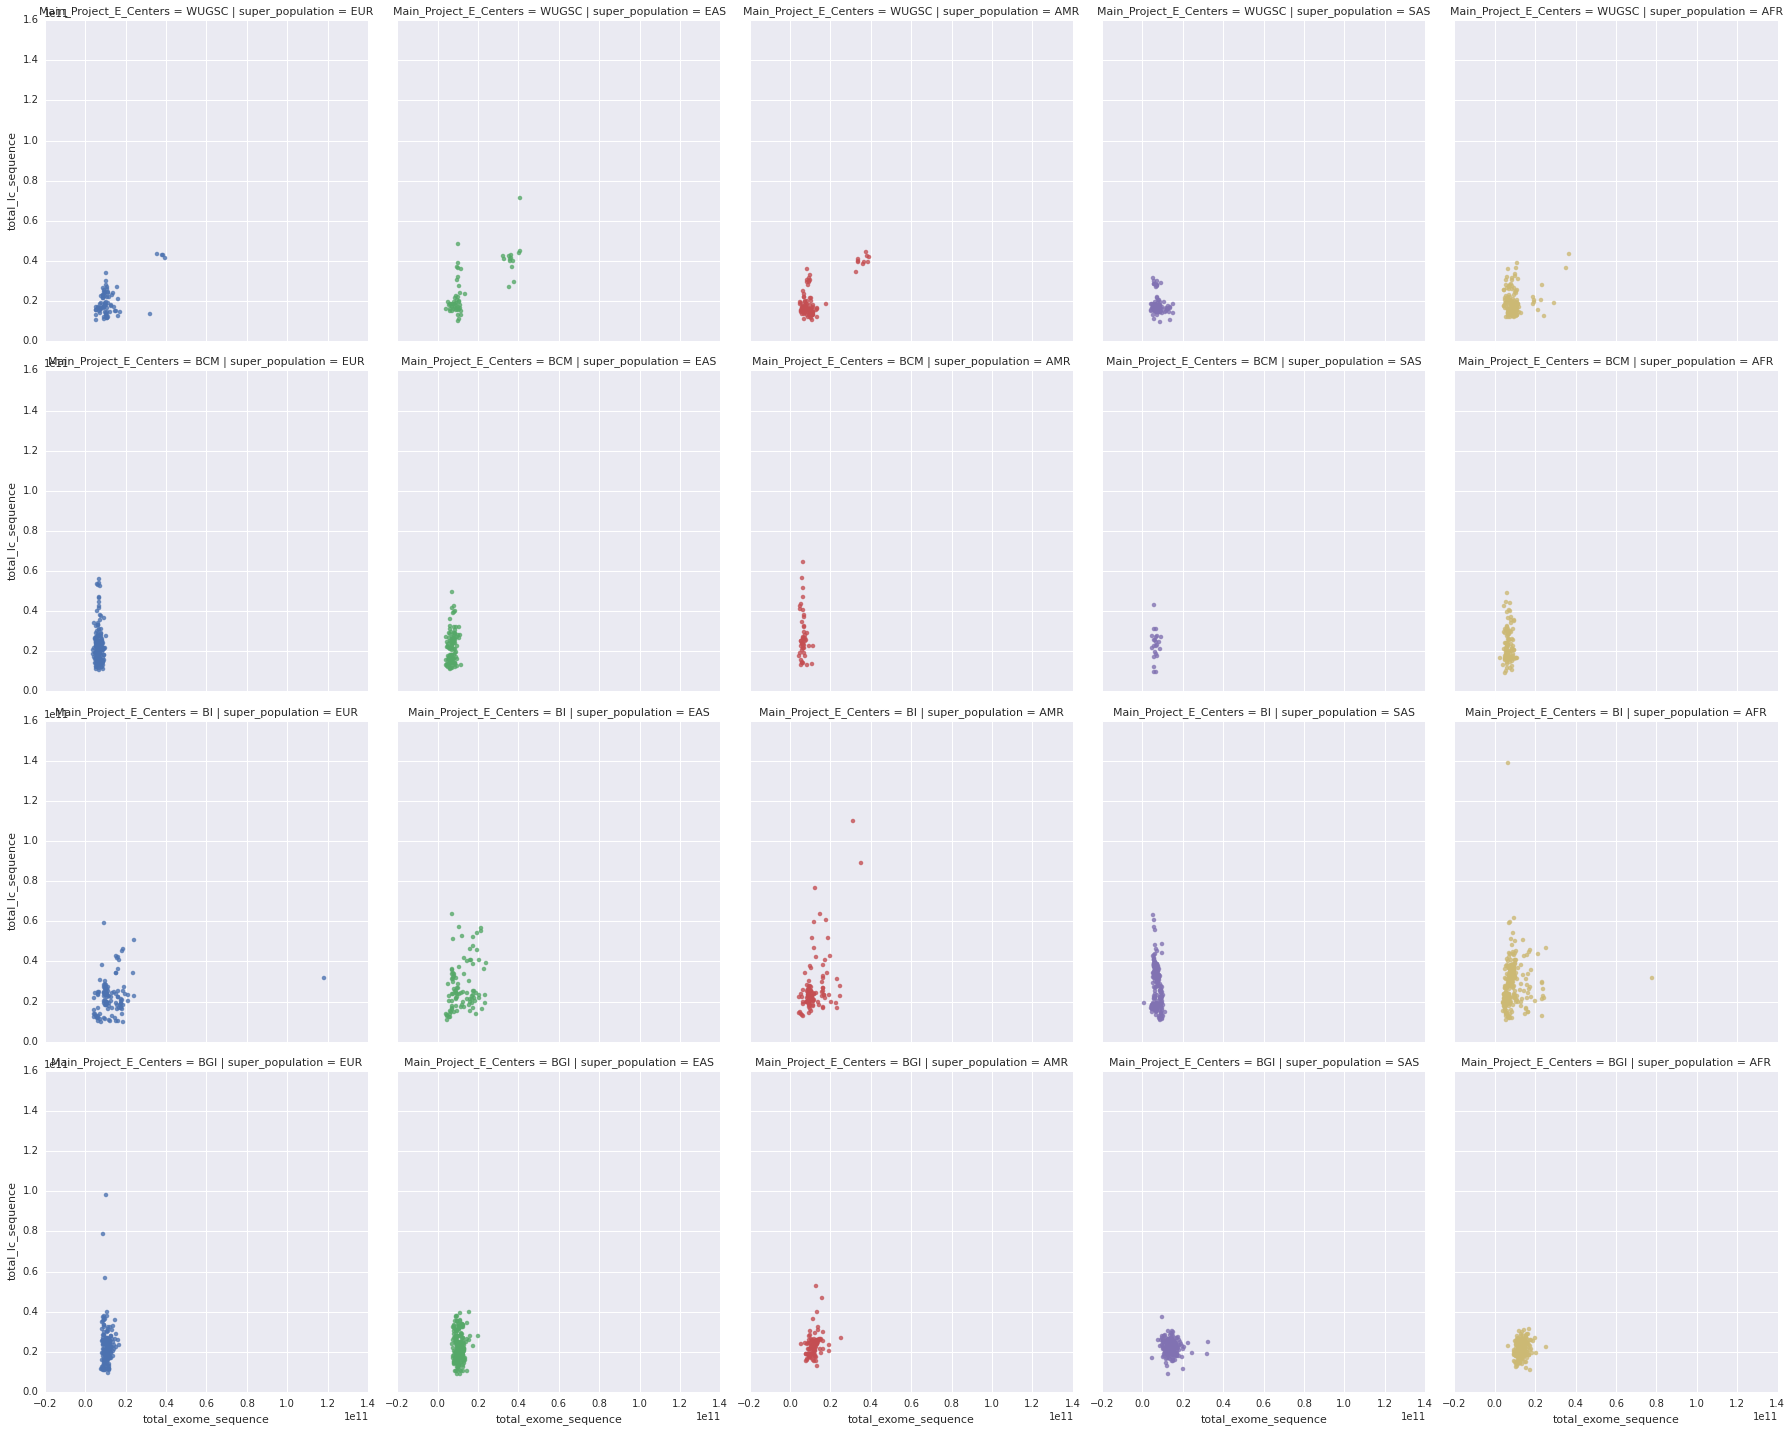

In [13]:
g = sns.lmplot('total_exome_sequence', 'total_lc_sequence', hue='super_population', col='super_population', row='Main_Project_E_Centers', data=df, fit_reg=False)

With the data now faceted by super population as well as genomic center, the variability of the Broad institute data becomes more apparent. Furthermore, the outlier cluster noted earlier in the WUGSC facet appears to be primarily constituted by the EAS and AMR super populations, with no representation from the SAS super population.